### Distribution
- Normal
- Bernoulli
- Binomial


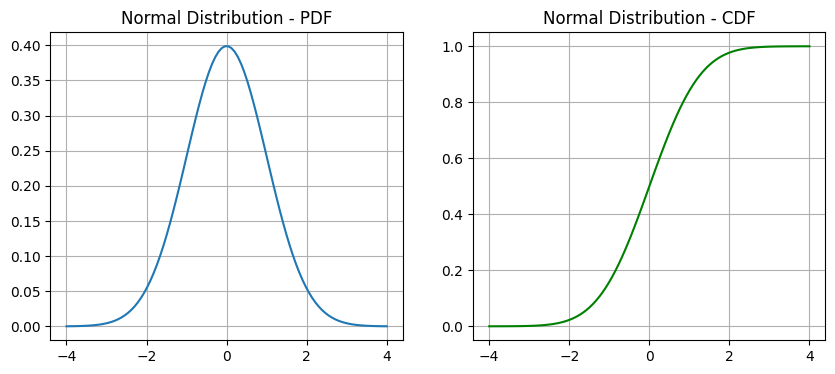

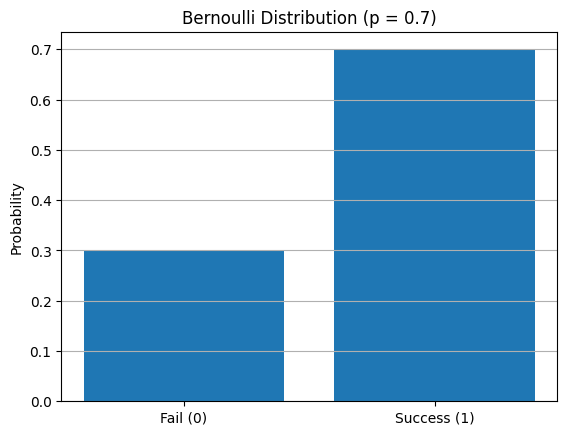

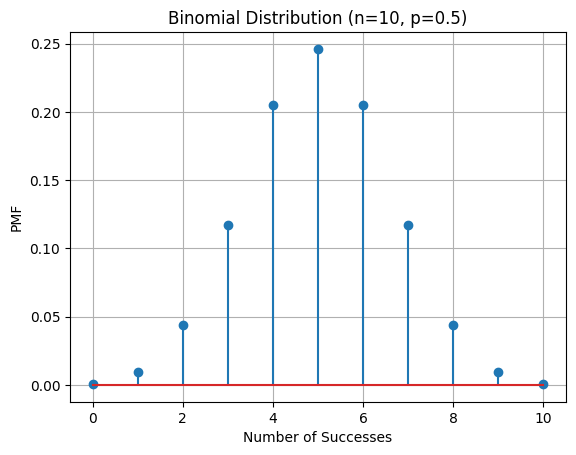

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom

# Set random seed for reproducibility
np.random.seed(42)

# 1. NORMAL DISTRIBUTION
mean = 0
std_dev = 1
x = np.linspace(-4, 4, 100)
pdf = norm.pdf(x, loc=mean, scale=std_dev)
cdf = norm.cdf(x, loc=mean, scale=std_dev)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label="PDF")
plt.title("Normal Distribution - PDF")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, cdf, color="green", label="CDF")
plt.title("Normal Distribution - CDF")
plt.grid(True)
plt.show()

# 2. BERNOULLI DISTRIBUTION (Single Trial)
p = 0.7
x = [0, 1]
pmf = bernoulli.pmf(x, p)

plt.bar(x, pmf, tick_label=["Fail (0)", "Success (1)"])
plt.title("Bernoulli Distribution (p = 0.7)")
plt.ylabel("Probability")
plt.grid(True, axis="y")
plt.show()

# 3. BINOMIAL DISTRIBUTION
n = 10  # Number of trials
p = 0.5 # Probability of success
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# plt.stem(x, pmf, use_line_collection=True)
plt.stem(x, pmf)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("PMF")
plt.grid(True)
plt.show()


## (Central Limit Theorem):
No matter what the original distribution of data is, the distribution of the sample means will tend to be normal (Gaussian) as the number of samples increases (usually n ≥ 30), provided the samples are independent and identically distributed (i.i.d.).

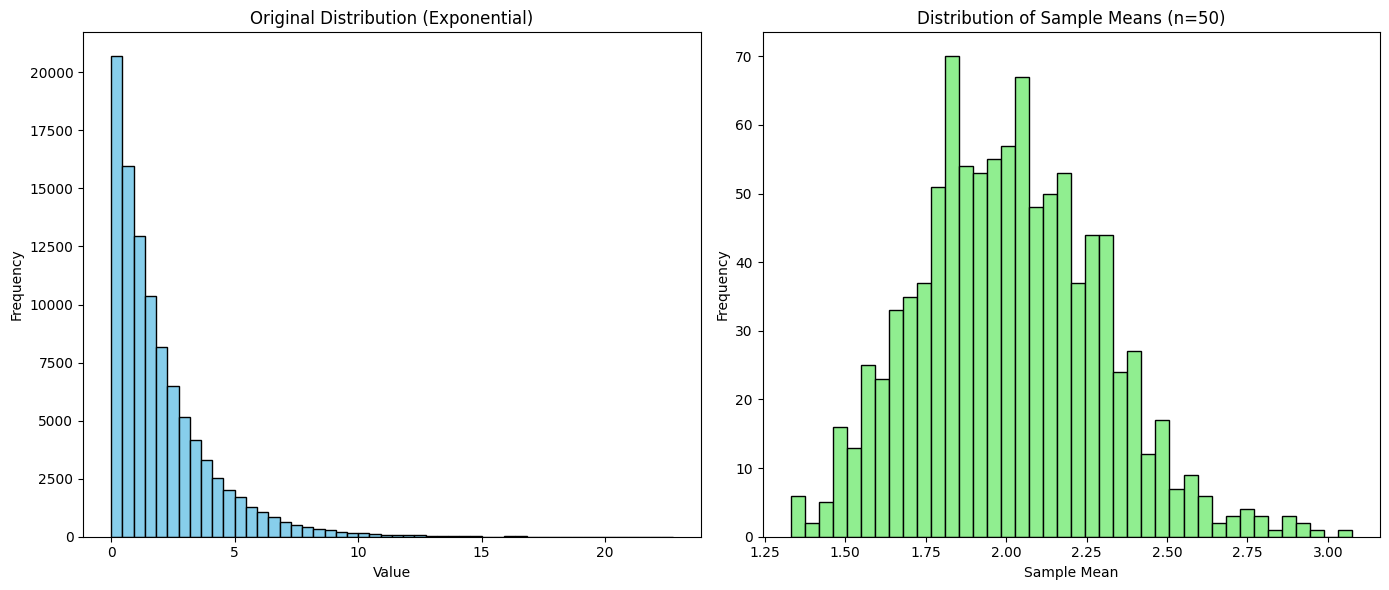

In [10]:
# TODO Try changing the distribution of the population and also try different sample_size(5, 30, 100),

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Original distribution (non-normal)
population = np.random.exponential(scale=2, size=100000)

# population = np.random.normal(loc=0, scale=1, size=100000) 
# population = np.random.uniform(low=0, high=10, size=100000)
# population = np.random.poisson(lam=5, size=100000)
# population = np.random.binomial(n=10, p=0.5, size=100000)
# population = np.random.beta(a=2, b=5, size=100000)
# population = np.random.gamma(shape=2, scale=2, size=100000)



# Step 2: Take many samples and compute their means
sample_means = []
sample_size = 50  # Size of each sample

for _ in range(1000):  # 1000 samples
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Step 3: Plot original distribution and distribution of sample means
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='skyblue', edgecolor='black')
plt.title("Original Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=40, color='lightgreen', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
